# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [255]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [256]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



643

In [257]:
cities


['donegal',
 'ushuaia',
 'bairiki',
 'georgetown',
 'adrar',
 'nogales',
 'isangel',
 'bethel',
 'tsihombe',
 'busselton',
 'tuatapere',
 'tanete',
 'touros',
 'erenhot',
 'ribeira grande',
 'upernavik',
 'rzhanitsa',
 'atuona',
 'saint-philippe',
 'mataura',
 'ulaangom',
 'mount isa',
 'barrow',
 'vao',
 'toliary',
 'fare',
 'cabo san lucas',
 'amderma',
 'severo-yeniseyskiy',
 'luderitz',
 'pavda',
 'kapaa',
 'olafsvik',
 'hermanus',
 'sorland',
 'dongsheng',
 'kodiak',
 'jalu',
 'vardo',
 'somerville',
 'cockburn harbour',
 'sri aman',
 'carnarvon',
 'tabiauea',
 'norman wells',
 'port hardy',
 'lavrentiya',
 'nanton',
 'rikitea',
 'taolanaro',
 'tasiilaq',
 'illoqqortoormiut',
 'mar del plata',
 'deep river',
 'najran',
 'tuy hoa',
 'punta arenas',
 'avarua',
 'turukhansk',
 'lyngdal',
 'zyryanka',
 'souillac',
 'virden',
 'nalut',
 'east london',
 'shimoda',
 'halalo',
 'huarmey',
 'aitape',
 'salalah',
 'gorom-gorom',
 'maghama',
 'port alfred',
 'montevideo',
 'talnakh',
 'yello

In [258]:
# for all cities in the cities set up list to hold each of the values
cityname = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []
# smallcities = ['longyearbyen',
#  'andros town',
#  'bredasdorp',
#  'isangel']


In [259]:

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()


# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={units}&q="
counter = 1


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [260]:

# loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval')
for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        cityname.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        maxtemp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        windspeed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(datetime.datetime.fromtimestamp(weather_response['dt']).strftime('%m-%d-%Y'))
        print(f'City Record - {counter} for {city}')
        counter = counter + 1
    except KeyError:
        print('City Not Found')
        

print('Data Retrieval Complete')


Beginning Data Retrieval
City Record - 1 for donegal
City Record - 2 for ushuaia
City Record - 3 for bairiki
City Record - 4 for georgetown
City Record - 5 for adrar
City Record - 6 for nogales
City Record - 7 for isangel
City Record - 8 for bethel
City Not Found
City Record - 9 for busselton
City Record - 10 for tuatapere
City Record - 11 for tanete
City Record - 12 for touros
City Record - 13 for erenhot
City Record - 14 for ribeira grande
City Record - 15 for upernavik
City Record - 16 for rzhanitsa
City Record - 17 for atuona
City Record - 18 for saint-philippe
City Record - 19 for mataura
City Record - 20 for ulaangom
City Record - 21 for mount isa
City Record - 22 for barrow
City Record - 23 for vao
City Not Found
City Record - 24 for fare
City Record - 25 for cabo san lucas
City Not Found
City Record - 26 for severo-yeniseyskiy
City Record - 27 for luderitz
City Not Found
City Record - 28 for kapaa
City Record - 29 for olafsvik
City Record - 30 for hermanus
City Record - 31 for 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [262]:
# Convert Data in to a DataFrame
ct_df = pd.DataFrame({
    'City': cityname,
    'Latitude': lat,
    'Longitude': lon,
    'Tempature': maxtemp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Windspeed': windspeed,
    'Country': country,
    'Date of Weather': date
})

# export data to .csv
ct_df.to_csv(r"cities.csv")

In [263]:
# display data frame
ct_df.head()

,City,Latitude,Longitude,Tempature,Humidity,Cloudiness,Windspeed,Country,Date of Weather
0,Donegal,54.6500,-8.1167,68.04,63,90,3.56,IE,09-12-2021
1,Ushuaia,-54.8000,-68.3000,42.46,70,75,0.00,AR,09-12-2021
2,Bairiki Village,1.3292,172.9752,82.06,74,97,21.88,KI,09-12-2021
3,George Town,5.4112,100.3354,80.89,82,20,0.00,MY,09-12-2021
4,Adrar,20.5022,-10.0711,104.59,15,89,10.74,MR,09-12-2021


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 
----
Student Note - There were not cities with humidity > 100; as such there will be no need to check indicies or remove the cities and create new DF



In [264]:
# sorting ct_df by humidity ascending=false to dertermine if any rows are greater than 100
hum_df = ct_df.sort_values('Humidity', ascending=False)
hum_df.head()

,City,Latitude,Longitude,Tempature,Humidity,Cloudiness,Windspeed,Country,Date of Weather
38,Norman Wells,65.2820,-126.8329,41.04,100,75,3.44,CA,09-12-2021
520,Äänekoski,62.6946,25.8180,55.47,100,100,7.65,FI,09-12-2021
212,Tuktoyaktuk,69.4541,-133.0374,42.80,100,90,10.36,CA,09-12-2021
464,Haines Junction,60.7522,-137.5108,28.35,100,55,0.00,CA,09-12-2021
183,Ketchikan,55.3422,-131.6461,54.07,100,90,9.22,US,09-12-2021


In [52]:
#  Get the indices of cities that have humidity over 100%.


In [51]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [265]:
# capture today's date for plot titles
# date = "09/12/2021"
date = ct_df.iloc[1,8]

# capturing data variables for plots
lat = ct_df['Latitude']
temp = ct_df['Tempature']
humidity = ct_df['Humidity']
cloudy = ct_df['Cloudiness']
windspeed = ct_df['Windspeed']

print(date)

09-12-2021


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Student Note - The plot seems to demonstrate that as latitudes move away from the equator tempatures also decrease or increase more.

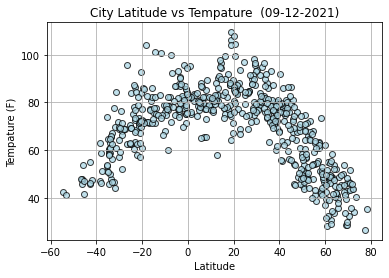

In [266]:
# create a scatter plot using lat and temp for the axis
plt.scatter(lat, temp, marker="o", facecolors="lightblue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs Tempature  ({date})")
plt.xlabel('Latitude')
plt.ylabel('Tempature (F)')
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\lat-v-temp.png")
plt.show()

## Latitude vs. Humidity Plot

Student Note - There does not appear to be any correlation between latitude and humidity percengage;


Student Note - Within the dataset of cities selected, at the equator, there are no cities below 60% humidity; this could be researched or proven by looking at more cities with latitudes closer to the equator.

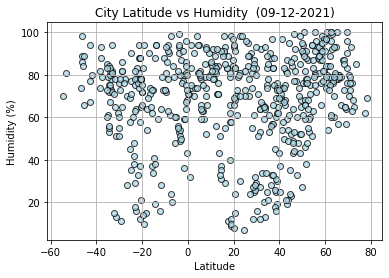

In [267]:
# create a scatter plot using lat and humidity for the axis
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs Humidity  ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\lat-v-humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

Student Note - While no obvious correlation is observed, it does appear that within the dataset of cities and when north of the equator, there are more citie closer or at 100% cloudiness and alos at or close to 0% cloudiness.

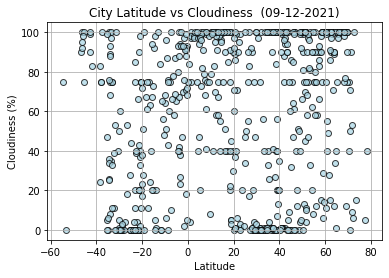

In [268]:
# create a scatter plot using lat and humidity for the axis
plt.scatter(lat, cloudy, marker="o", facecolors="lightblue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs Cloudiness  ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\lat-v-cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

Student Note - There does not appear to be any visual corelation between latitude and windspeed in the data set of cities selected.

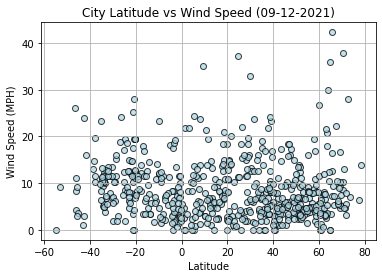

In [269]:
# create a scatter plot using lat and humidity for the axis
plt.scatter(lat, windspeed, marker="o", facecolors="lightblue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\lat-v-wdspeed.png")
plt.show()

## Linear Regression

In [270]:
# creating dataframes to hold the northern and southern hemisphere and confirmed there are no cities with 0 latidute
nhemi_df = ct_df[ct_df['Latitude'] >= 0]

shemi_df = ct_df[ct_df['Latitude'] <= 0]

# eq_df = ct_df[ct_df['Latitude'] == 0]

# eq_df.head()
shemi_df.head()

,City,Latitude,Longitude,Tempature,Humidity,Cloudiness,Windspeed,Country,Date of Weather
1,Ushuaia,-54.8000,-68.3000,42.46,70,75,0.00,AR,09-12-2021
6,Isangel,-19.5500,169.2667,72.25,83,51,8.41,VU,09-12-2021
8,Busselton,-33.6500,115.3333,48.09,80,97,3.80,AU,09-12-2021
9,Tuatapere,-46.1333,167.6833,47.82,86,95,8.25,NZ,09-12-2021
10,Tanete,-3.9443,119.7848,75.07,93,100,0.07,ID,09-12-2021


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Student Note - The regression plot of Northern Hemisphere tempatures compared to latitudes seems to indicate that as latitude increases or "further from the equator" the tempature decreases.  The R value would seem to indicate this is not fully correlated but is more corelated than not.


The r-squared is: 0.628719436593786


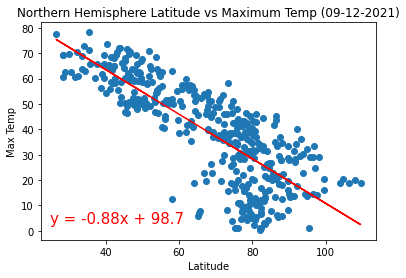

In [281]:
# adding the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = nhemi_df['Tempature']
y_values = nhemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,3),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Latitude vs Maximum Temp ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\north- lat-v-temp-regress.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Student Notes - When comparing the southern hemisphere to max temp regression, it generally appears that tempatures increase as you move closer to the equator; while not as strong as the regression in the northern hemisphere, the data set still presented an r value that is more correlated than not.

The r-squared is: 0.5754038155592133


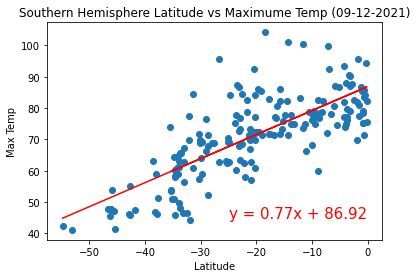

In [272]:
# adding the linear regression equation and line to plot for souther hemisphere latitudes and temaptures with equation and r score
# Add the linear regression equation and line to plot
x_values = shemi_df['Latitude']
y_values = shemi_df['Tempature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.title(f"Southern Hemisphere Latitude vs Maximume Temp ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\south-lat-v-temp-regress.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Student Note - In review of the regression plot for Northern Hemisphere Latitudes compared to Humidity, there does not appear to be a strong correlation.  This is supported by an R value close to 0.  

The r-squared is: 0.017242908408386968


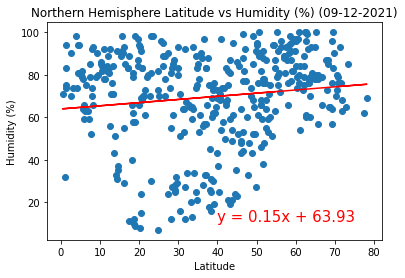

In [273]:
# adding the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = nhemi_df['Latitude']
y_values = nhemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,11),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Latitude vs Humidity (%) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\north-lat-v-hum-regress.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Student Note - In review of the regression plot of Southern Hemisphere - Humiidty % vs Latitude, there is a slightly stronger correlation in the data set than in the Northern Hemisphere, but still not a strong correlation.

The r-squared is: 0.00519079540168861


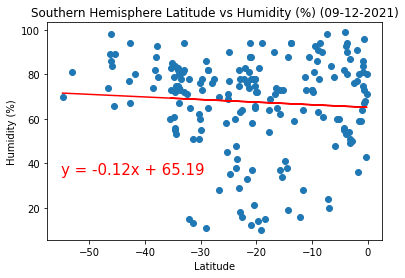

In [282]:
# adding the linear regression equation and line to plot for souther hemisphere latitudes and temaptures with equation and r score
# Add the linear regression equation and line to plot
x_values = shemi_df['Latitude']
y_values = shemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.title(f"Southern Hemisphere Latitude vs Humidity (%) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\south-lat-v-hum-regress.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Student Note - The plot does not demonstrate a strong or observeable correlation visually.  Some concentrations of cities appear to exist in the data set at the upper and lower bounds of cloudienss percantages.  The R value also does not indicate a strong coorelation.

The r-squared is: 0.00030594482779119843


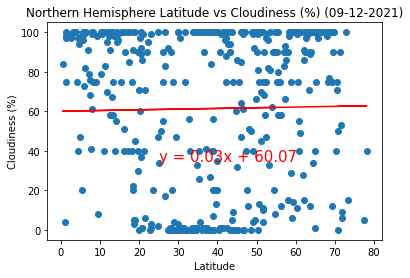

In [284]:
# adding the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = nhemi_df['Latitude']
y_values = nhemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,35),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Latitude vs Cloudiness (%) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\north-lat-v-cloud-regress.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Student Note - Akin to the northern hemisphere regression of cloudieness and latitude, there is not a strong visual correlation and the r score also appears to support this.

The r-squared is: 0.010322143967590038


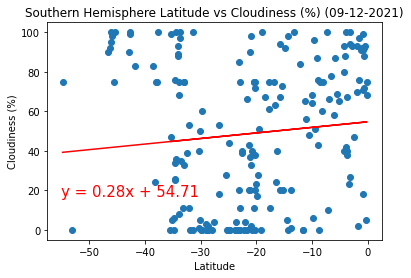

In [286]:
# adding the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = shemi_df['Latitude']
y_values = shemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,17),fontsize=15,color="red")
plt.title(f"Southern Hemisphere Latitude vs Cloudiness (%) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\south-lat-v-cloud-regress.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Student Note - IN review of the regression plot and the r score, there is not a strong or observeable correlation between wind speed and latitude in the Northern Hemisphere.

The r-squared is: 0.00012403044031348575


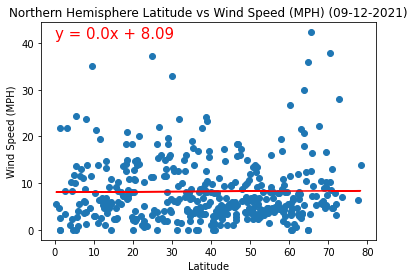

In [288]:
# adding the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = nhemi_df['Latitude']
y_values = nhemi_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,41),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Latitude vs Wind Speed (MPH) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\north-lat-v-wind-regress.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Student Note - Again akin to the northern hemisphere regression plot, there is not an observeable correlation and this is also supported by the r score.  The dataset for the southern hemisphere does appear to be slightly more correlated than the northern hemisphere.

The r-squared is: 0.0349426494125626


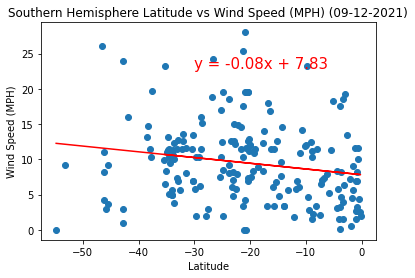

In [290]:
# adding the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = shemi_df['Latitude']
y_values = shemi_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,23),fontsize=15,color="red")
plt.title(f"Southern Hemisphere Latitude vs Wind Speed (MPH) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\south-lat-v-wind-regress.png")
plt.show()